In [1]:
# Load required packages
library(survival)
library(survminer)
library(dplyr)

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [24]:
# install.packages('showtext')

In [25]:
# library(showtext)
# showtext_auto()

In [3]:
options(repr.plot.width = 14, repr.plot.height = 14)

### AC

#### CD117 Survival Probability

In [4]:
df_ac <- read.csv("ac.csv")
df_tc <- read.csv("tc.csv")
df_sclc <- read.csv("sclc.csv")
df_lcnec <- read.csv("lcnec.csv")

In [5]:
df_all <- bind_rows(df_ac, df_tc, df_lcnec, df_sclc)
df_all

序号,分型,CD117阳性,性别,年龄,是否抽烟,肿瘤大小.直径cm.,淋巴结转移,pTNM分期,术前是否化疗,生存.月.,存活
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>
1,AC,否,男,57,是,3.5,是,II期,否,9,否
2,AC,否,女,53,否,2.0,否,I期,否,14,是
3,AC,否,男,51,否,1.8,否,I期,否,22,否
4,AC,否,男,58,是,3.2,否,I期,否,31,是
5,AC,否,女,46,否,1.7,否,I期,否,54,是
6,AC,否,男,62,是,2.4,否,I期,否,60,是
7,AC,否,男,58,是,2.2,否,I期,否,65,是
8,AC,否,女,69,否,2.4,否,I期,否,69,是
9,AC,否,男,68,是,2.0,否,I期,否,75,是


In [6]:
# 1 is null 2 is event
df_all$淋巴结转移 <- factor(df_all$淋巴结转移, 
                     levels = c("是", "否"), 
                     labels = c("是", "否"))
                     # labels = c(1, 0))
df_all$分型 <- factor(df_all$分型, 
                     levels = c("AC", "TC", "SCLC", "LCNEC"), 
                     labels = c("AC", "TC", "SCLC", "LCNEC"))
                     # labels = c(1, 2, 3, 4))
df_all$性别 <- factor(df_all$性别, 
                     levels = c("男", "女"), 
                     labels = c("男", "女"))
                     # labels = c(1, 0))
df_all$是否抽烟 <- factor(df_all$是否抽烟, 
                     levels = c("是", "否"), 
                     labels = c("是", "否"))
                     # labels = c(1, 0))
df_all$pTNM分期 <- factor(df_all$pTNM分期, 
                     levels = c("I期", "II期", "III期"), 
                     labels = c("I期", "II期", "III期"))
                     # labels = c(1, 2, 3))
df_all$术前是否化疗 <- factor(df_all$术前是否化疗, 
                     levels = c("是", "否"), 
                     labels = c("是", "否"))
                     # labels = c(1, 0))
df_all$CD117阳性 <- factor(df_all$CD117阳性, 
                     levels = c("是", "否"), 
                     labels = c("是", "否"))
                     # labels = c(1, 0))
# df_all$存活 <- factor(df_all$存活, 
#                      levels = c("是", "否"), 
#                      # labels = c("是", "否"))
#                      labels = c(0, 1))
df_all$存活 <- df_all$存活 == "否"

df_all

序号,分型,CD117阳性,性别,年龄,是否抽烟,肿瘤大小.直径cm.,淋巴结转移,pTNM分期,术前是否化疗,生存.月.,存活
<int>,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<int>,<lgl>
1,AC,否,男,57,是,3.5,是,II期,否,9,TRUE
2,AC,否,女,53,否,2.0,否,I期,否,14,FALSE
3,AC,否,男,51,否,1.8,否,I期,否,22,TRUE
4,AC,否,男,58,是,3.2,否,I期,否,31,FALSE
5,AC,否,女,46,否,1.7,否,I期,否,54,FALSE
6,AC,否,男,62,是,2.4,否,I期,否,60,FALSE
7,AC,否,男,58,是,2.2,否,I期,否,65,FALSE
8,AC,否,女,69,否,2.4,否,I期,否,69,FALSE
9,AC,否,男,68,是,2.0,否,I期,否,75,FALSE


In [7]:
df_all$年龄 <- as.double(df_all$年龄)
df_all$生存.月. <- as.double(df_all$生存.月.)

In [8]:
df_all

序号,分型,CD117阳性,性别,年龄,是否抽烟,肿瘤大小.直径cm.,淋巴结转移,pTNM分期,术前是否化疗,生存.月.,存活
<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<lgl>
1,AC,否,男,57,是,3.5,是,II期,否,9,TRUE
2,AC,否,女,53,否,2.0,否,I期,否,14,FALSE
3,AC,否,男,51,否,1.8,否,I期,否,22,TRUE
4,AC,否,男,58,是,3.2,否,I期,否,31,FALSE
5,AC,否,女,46,否,1.7,否,I期,否,54,FALSE
6,AC,否,男,62,是,2.4,否,I期,否,60,FALSE
7,AC,否,男,58,是,2.2,否,I期,否,65,FALSE
8,AC,否,女,69,否,2.4,否,I期,否,69,FALSE
9,AC,否,男,68,是,2.0,否,I期,否,75,FALSE


In [9]:
surv_object <- Surv(time = df_all$生存.月., event = df_all$存活)
surv_object

 [1]   9   14+  22   31+  54+  60+  65+  69+  75+ 103+  17   24+  36+  45+  51+
[16]  60+  65+  66+  72+  74+  77+  83+  97+  99+   4    7    7   10   19+  26 
[31]  36+  40   44+  47   50+  54+  55+  56+  58+  59+  61+  65+  67+  96+   3 
[46]   6    6    8    9   11+  13   15   15+  20   21+  23   27   31   33   37+
[61]  38+  41+  44   45+  45+  47+  49+  50+  51+  53+  55+  55+  57   58+  59+
[76]  60+  63+  65+

Call: survfit(formula = surv_object ~ 1, data = df_all)

      n events median 0.95LCL 0.95UCL
[1,] 78     24     NA      NA      NA

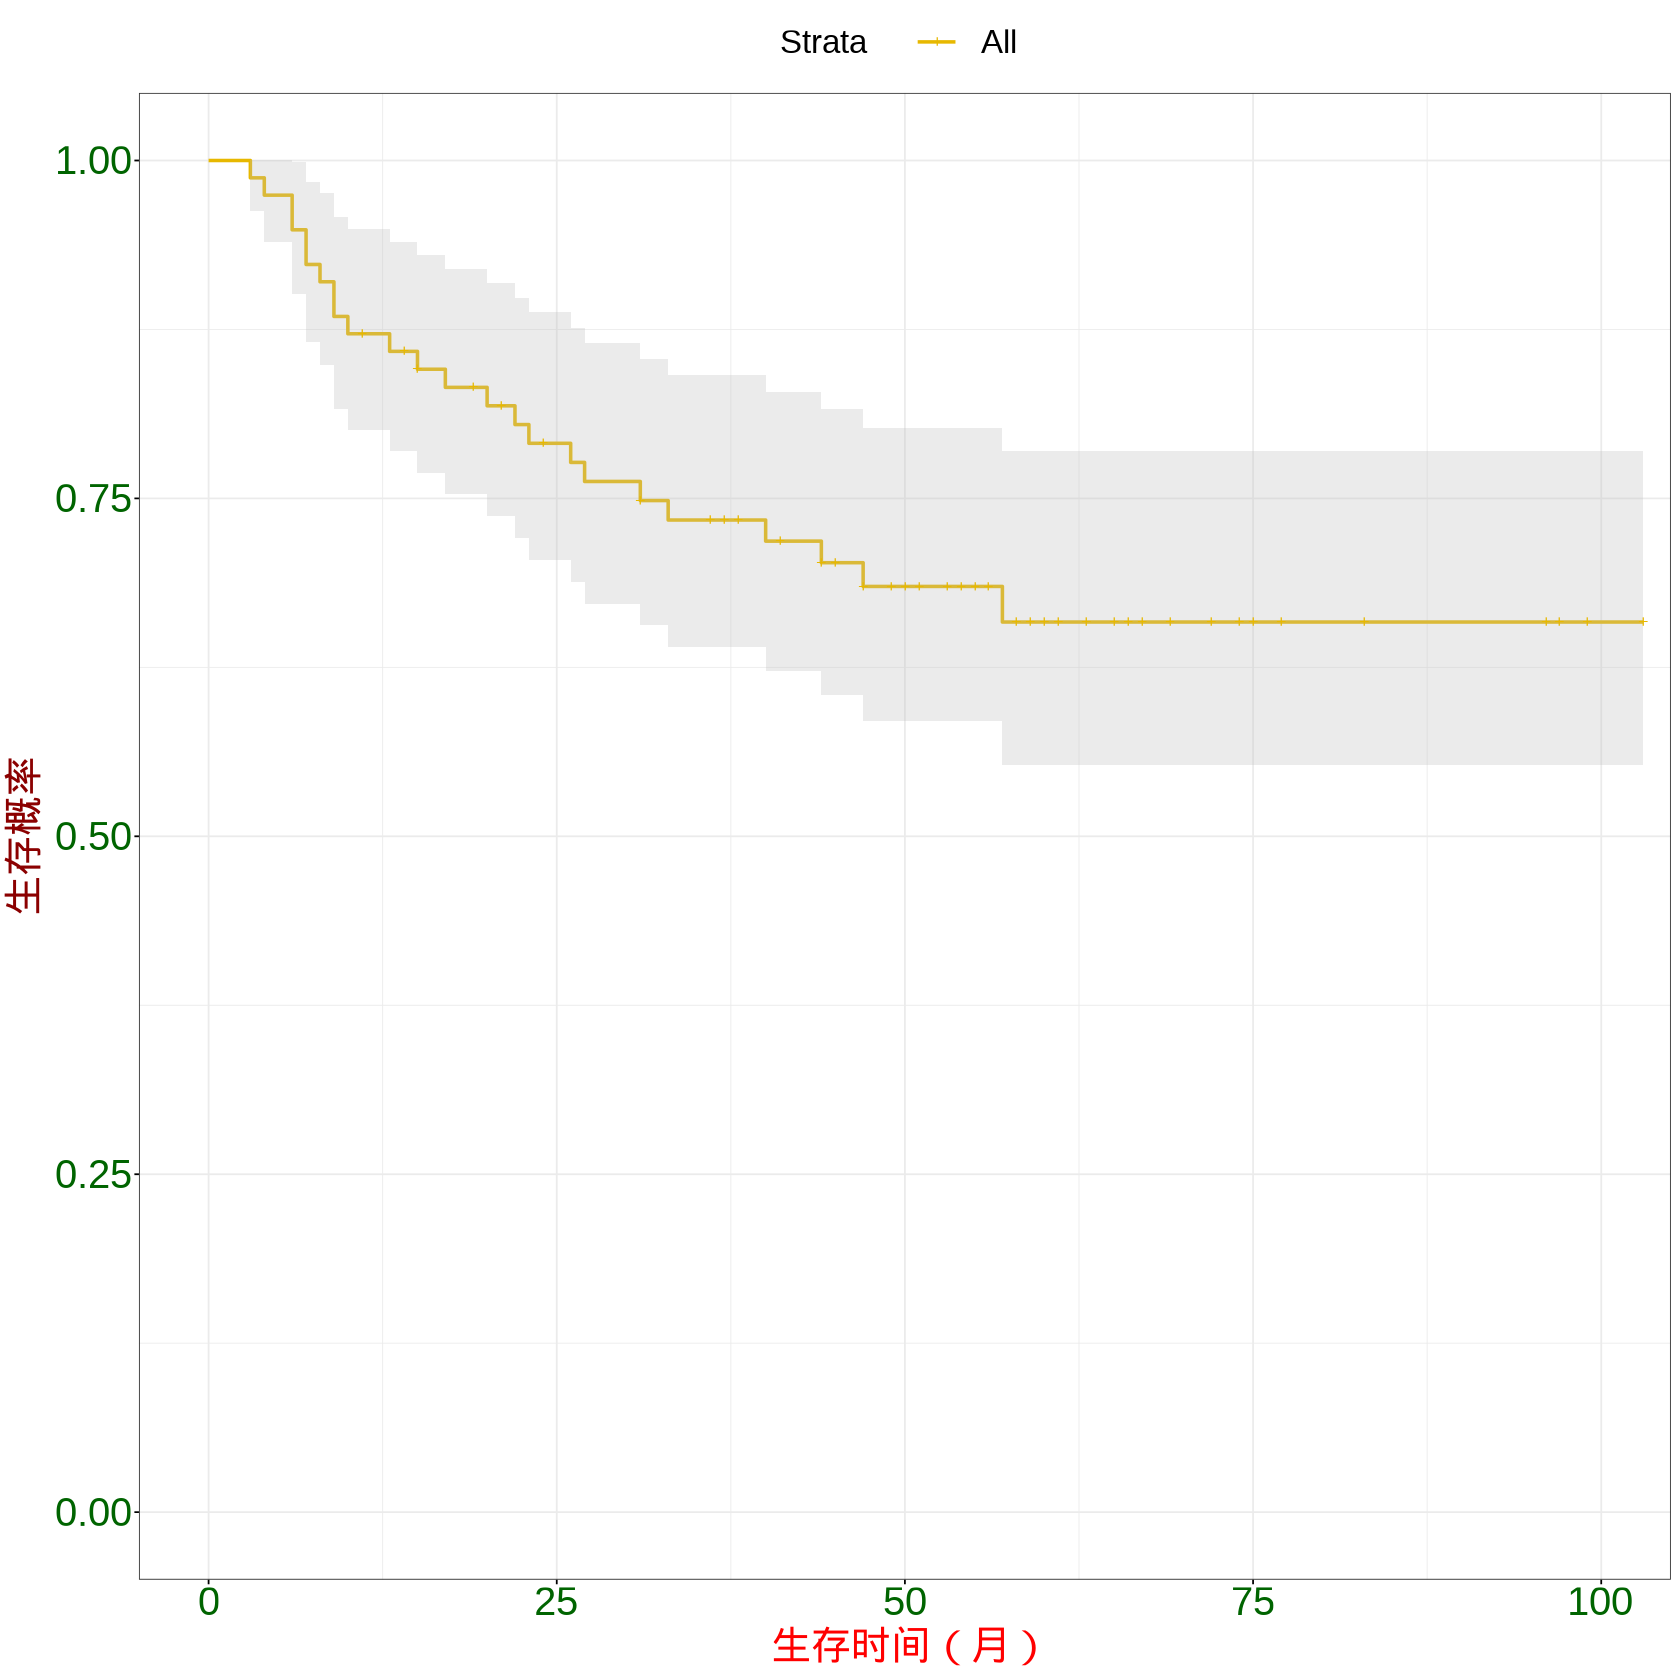

In [10]:
# Examine prdictive value of residual disease status
fit_overall <- survfit(surv_object ~ 1, data = df_all)
fit_overall
# plot(fit_overall, 
#      xlab = "生存时间（月）",
#      ylab = "生存概率")
# ggsurvplot(fit_overall, data = df_all)
plot_overall <- ggsurvplot(fit_overall,
           conf.int = TRUE,
           ggtheme = theme_bw(), # Change ggplot2 theme
           palette = c("#E7B800", "#2E9FDF"),
           xlab = "生存时间（月）", 
            ylab = "生存概率",
              font.x = c(30, "bold.italic", "red"),
   font.y = c(30, "bold.italic", "darkred"),
   font.tickslab = c(30, "plain", "darkgreen"))

# options(repr.plot.width = 14, repr.plot.height = 14)
plot_overall$plot <- plot_overall$plot + 
    # theme(legend.text = element_text(size = 14, color = "black", face = "bold"))
  theme(legend.key.size = unit(1, 'cm'), #change legend key size
        legend.key.height = unit(1, 'cm'), #change legend key height
        legend.key.width = unit(1, 'cm'), #change legend key width
        legend.title = element_text(size=25), #change legend title font size
        legend.text = element_text(size=25)) #change legend text font size
plot_overall

Call: survfit(formula = surv_object ~ 分型, data = df_all)

            n events median 0.95LCL 0.95UCL
分型=AC    10      2     NA      NA      NA
分型=TC    14      1     NA      NA      NA
分型=SCLC  34     14     57      33      NA
分型=LCNEC 20      7     NA      47      NA

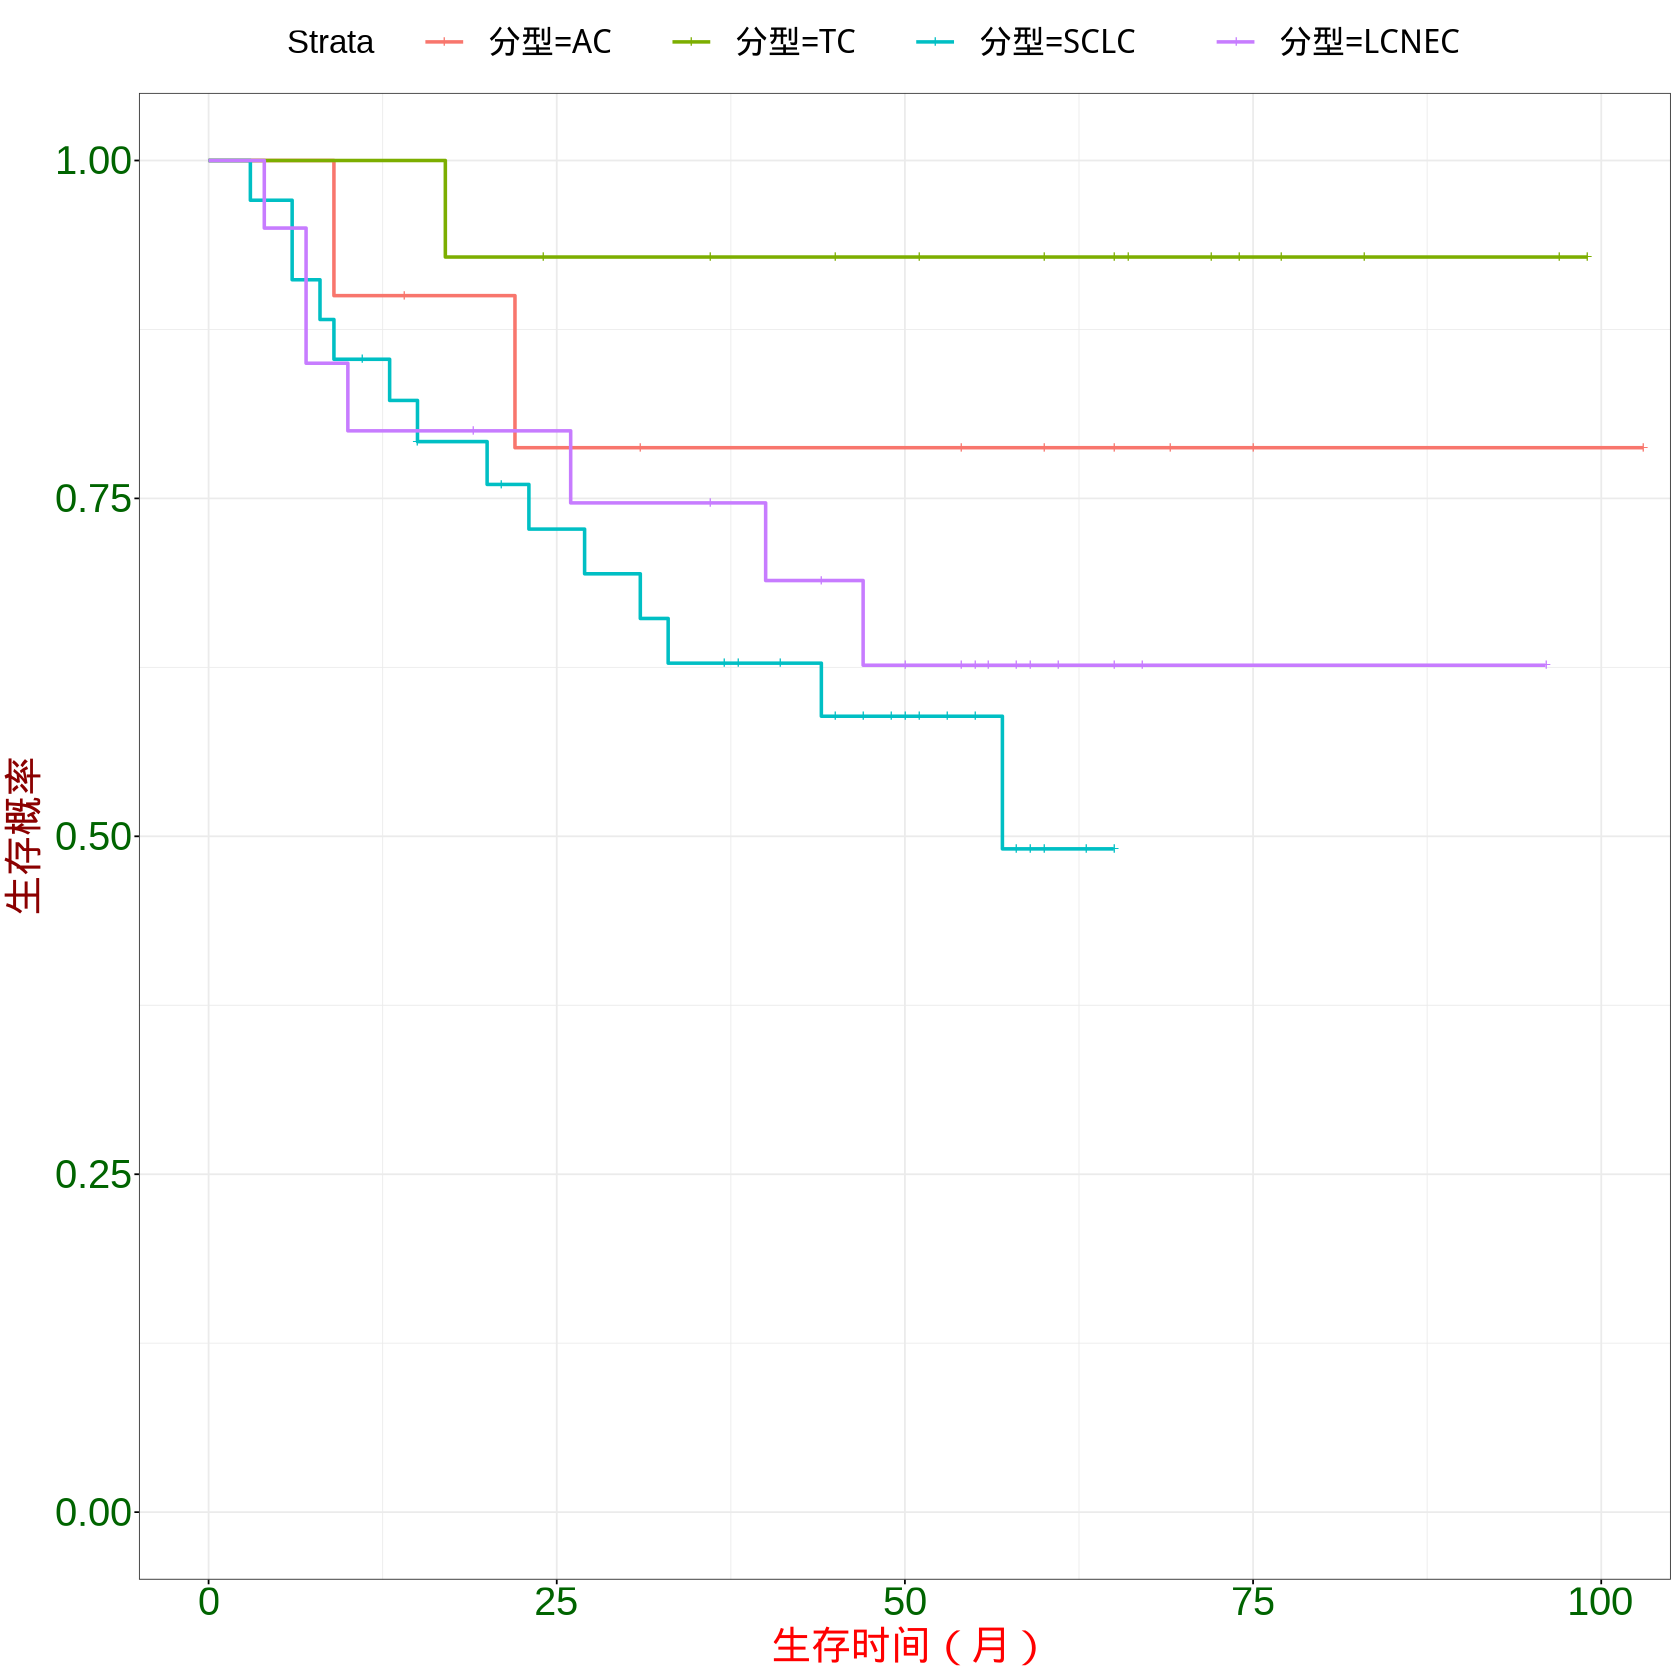

In [11]:
# Examine prdictive value of residual disease status
fit_type <- survfit(surv_object ~ 分型, data = df_all)
fit_type
plot_type <- ggsurvplot(fit_type,
           # conf.int = TRUE,
           ggtheme = theme_bw(), # Change ggplot2 theme
           # palette = c("#E7B800", "#2E9FDF"),
           xlab = "生存时间（月）", 
            ylab = "生存概率",
              font.x = c(30, "bold.italic", "red"),
   font.y = c(30, "bold.italic", "darkred"),
   font.tickslab = c(30, "plain", "darkgreen"))

# options(repr.plot.width = 14, repr.plot.height = 14)
plot_type$plot <- plot_type$plot + 
    # theme(legend.text = element_text(size = 14, color = "black", face = "bold"))
  theme(legend.key.size = unit(1, 'cm'), #change legend key size
        legend.key.height = unit(1, 'cm'), #change legend key height
        legend.key.width = unit(1, 'cm'), #change legend key width
        legend.title = element_text(size=25), #change legend title font size
        legend.text = element_text(size=25)) #change legend text font size
plot_type

In [12]:
head(df_all)

,序号,分型,CD117阳性,性别,年龄,是否抽烟,肿瘤大小.直径cm.,淋巴结转移,pTNM分期,术前是否化疗,生存.月.,存活
,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<lgl>
1,1,AC,否,男,57,是,3.5,是,II期,否,9,TRUE
2,2,AC,否,女,53,否,2.0,否,I期,否,14,FALSE
3,3,AC,否,男,51,否,1.8,否,I期,否,22,TRUE
4,4,AC,否,男,58,是,3.2,否,I期,否,31,FALSE
5,5,AC,否,女,46,否,1.7,否,I期,否,54,FALSE
6,6,AC,否,男,62,是,2.4,否,I期,否,60,FALSE


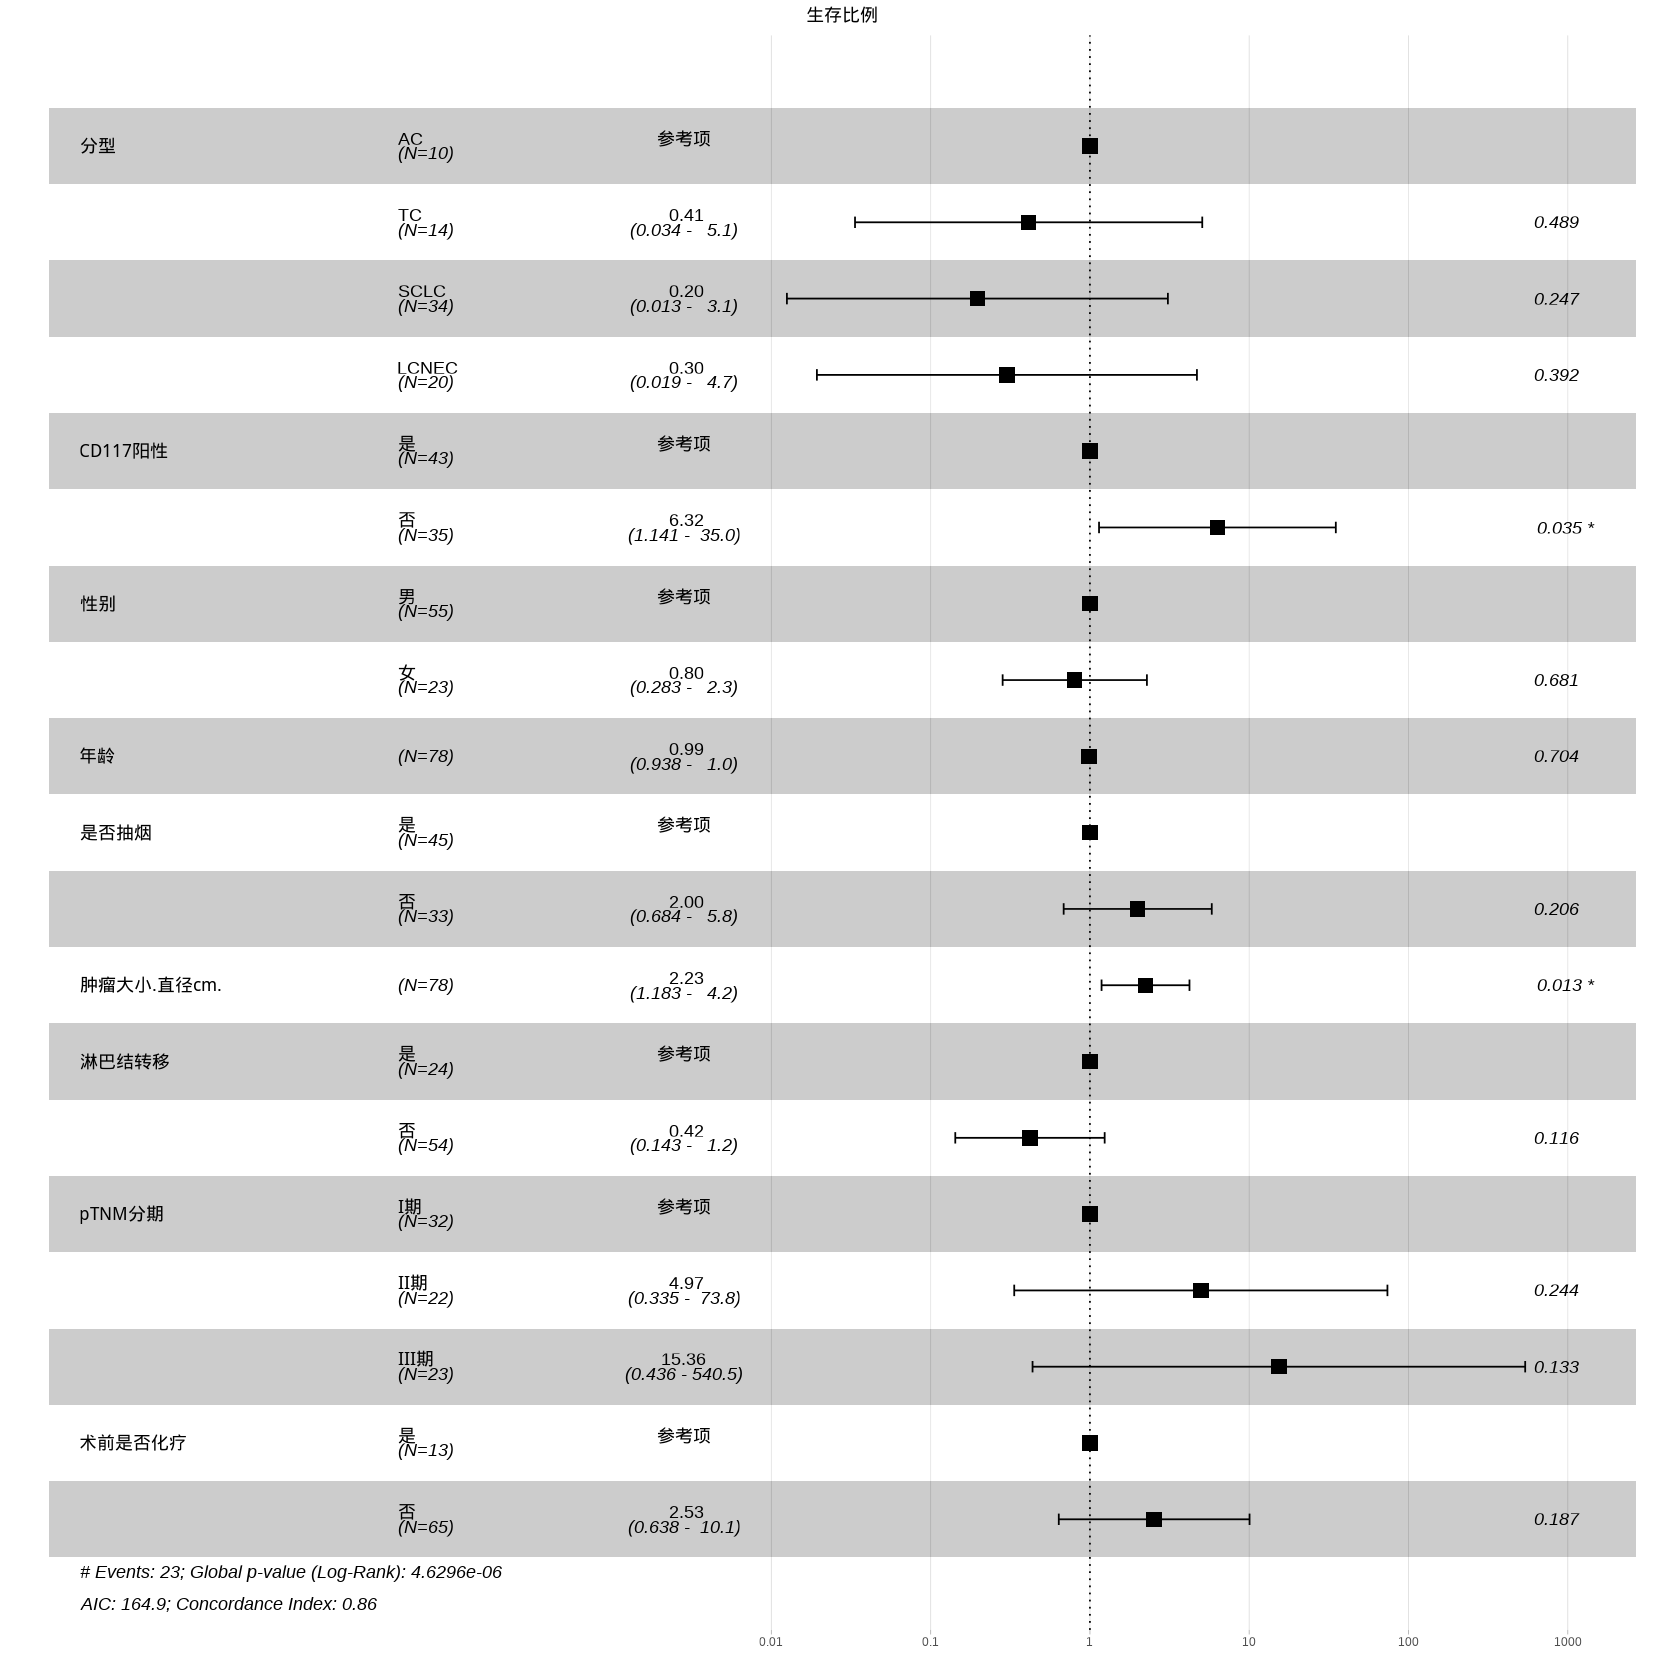

In [13]:
# Fit a Cox proportional hazards model
fit_coxph <- coxph(surv_object ~ 分型 + CD117阳性 + 性别 + 年龄 + 是否抽烟 + 肿瘤大小.直径cm. + 淋巴结转移 + pTNM分期 + 术前是否化疗,
                   data = df_all)
plot_forest <- ggforest(fit_coxph, data = df_all,
                        main = "生存比例",
                        # cpositions = c(0.02,0.22, 0.4),
                        fontsize = 1.2,
                        refLabel = "参考项")
plot_forest

In [14]:
summary(fit_coxph)

Call:
coxph(formula = surv_object ~ 分型 + CD117阳性 + 性别 + 
    年龄 + 是否抽烟 + 肿瘤大小.直径cm. + 淋巴结转移 + 
    pTNM分期 + 术前是否化疗, data = df_all)

  n= 77, number of events= 23 
   (1 observation deleted due to missingness)

                     coef exp(coef) se(coef)      z Pr(>|z|)  
分型TC           -0.88588   0.41235  1.28059 -0.692   0.4891  
分型SCLC         -1.62665   0.19659  1.40501 -1.158   0.2470  
分型LCNEC        -1.19994   0.30121  1.40153 -0.856   0.3919  
CD117阳性否       1.84328   6.31721  0.87323  2.111   0.0348 *
性别女           -0.21893   0.80337  0.53207 -0.411   0.6807  
年龄             -0.01038   0.98968  0.02729 -0.380   0.7038  
是否抽烟否        0.69094   1.99558  0.54619  1.265   0.2059  
肿瘤大小.直径cm.  0.80376   2.23393  0.32423  2.479   0.0132 *
淋巴结转移否     -0.86666   0.42035  0.55093 -1.573   0.1157  
pTNM分期II期      1.60336   4.96971  1.37633  1.165   0.2440  
pTNM分期III期     2.73150  15.35585  1.81685  1.503   0.1327  
术前是否化疗否    0.92878   2.53143  0.70355  1.320   0.1868  
---
Signif. cod